Goals:
- Set up Python and Jupyter
    - Show Colab
    - Show VS Code
    - Show miniconda
    - Set up conda environment
- Get data
    - UCI, pick regression task
    - Put data on GitHub
    - Show how to access data in Colab
- Load data
    - Load with numpy
    - Load with pandas
- Show data
    - Matplotlib
    - Pick a couple features
- Regression
    - Derive gradient
    - Gradient descent

# Set up Python & Jupyter

### Google Colab: 
- runs on the cloud
- has most popular libraries
- has good support for widgets (better for data visualization)
- [https://colab.research.google.com](https://colab.research.google.com)
- cell magic and shell commands for advanced control (installing other things, [etc.](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.05-IPython-And-Shell-Commands.ipynb#scrollTo=WclyQSP7cvmP))

### VSCode: 
- runs on the local system (though it can run remotely)
- better for larger projects with multiple Python modules
- I manage the environment
- [https://code.visualstudio.com/](https://code.visualstudio.com/)

### Miniconda
- Set up Python environments without messing with your system environment
- No need for it's larger sibling, conda
- [https://www.anaconda.com/docs/getting-started/miniconda/main](https://www.anaconda.com/docs/getting-started/miniconda/main)

### Set up an environment
- Terminal
- (ahead of time) `conda deactivate && clear`
- `conda create -n recitation python=3.12 jupyter numpy pandas matplotlib`
- `conda activate recitation`
- Getting stuff for an environment into a text file: `conda env export > env.yaml`
- Removing an environment: `conda env remove -n recitation`

# Get Data

### UCI's Machine Learning Repository: 
- [https://archive.ics.uci.edu](https://archive.ics.uci.edu)
- View datasets
- Find a dataset for regression that looks fun
    - Task: Regression
    - Data type: Multivariate
- Download

### Put data on GitHub
- [https://github.com](https://github.com)
- Create repository (empty)
- Copy repo URL
- VS Code terminal `cd ~/Developer`
- `git clone <repo URL>`
- Open in VS Code
- Into the repo, put: this notebook, the README.md, and the data folders
    - Notebooks are optional. I recommend using Colab, but will set up both here.
- Get data on GitHub
    - `cd new repo`
    - `git branch -M main`
    - `git add .`
    - `git commit -m "Initial commit"`
    - `git push -u origin main`
    - Publish branch
- View data on GitHub

### Data in Colab
- In a code cell: `!wget <URL>` (from raw link)
- Browser
    - Open data in side panel
- Edit cell:
```
%%capture
!wget <URL>
```
- New cell:
```
from pathlib import Path
DATA_PATH = "imports-85.data"
Path(DATA_PATH).exists()
```

# Load Data

In [1]:
# Check existence of data
from pathlib import Path
DATA_PATH = "automobile/imports-85.data"
Path(DATA_PATH).exists()

True

### Numpy

In [2]:
import numpy as np

In [3]:
# This causes an error:
# np.loadtxt(DATA_PATH)  # I suggested tidying up notebooks and not leaving error traces.

# In the rare case it is worthwhile, the following is a convenient and tidy way to
#   leave an error in a notebook for grading.
try:
    np.loadtxt(DATA_PATH)
except ValueError as e:
    print(f"{e}")

could not convert string '3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi, to float64 at row 0, column 1.


In [4]:
data = np.genfromtxt(DATA_PATH, delimiter=',', missing_values='?')

In [5]:
data

array([[ 3.0000e+00,         nan,         nan, ...,  2.1000e+01,
         2.7000e+01,  1.3495e+04],
       [ 3.0000e+00,         nan,         nan, ...,  2.1000e+01,
         2.7000e+01,  1.6500e+04],
       [ 1.0000e+00,         nan,         nan, ...,  1.9000e+01,
         2.6000e+01,  1.6500e+04],
       ...,
       [-1.0000e+00,  9.5000e+01,         nan, ...,  1.8000e+01,
         2.3000e+01,  2.1485e+04],
       [-1.0000e+00,  9.5000e+01,         nan, ...,  2.6000e+01,
         2.7000e+01,  2.2470e+04],
       [-1.0000e+00,  9.5000e+01,         nan, ...,  1.9000e+01,
         2.5000e+01,  2.2625e+04]], shape=(205, 26))

In [6]:
data[0]

array([3.0000e+00,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 8.8600e+01,
       1.6880e+02, 6.4100e+01, 4.8800e+01, 2.5480e+03,        nan,
              nan, 1.3000e+02,        nan, 3.4700e+00, 2.6800e+00,
       9.0000e+00, 1.1100e+02, 5.0000e+03, 2.1000e+01, 2.7000e+01,
       1.3495e+04])

In [7]:
data[0, :]

array([3.0000e+00,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 8.8600e+01,
       1.6880e+02, 6.4100e+01, 4.8800e+01, 2.5480e+03,        nan,
              nan, 1.3000e+02,        nan, 3.4700e+00, 2.6800e+00,
       9.0000e+00, 1.1100e+02, 5.0000e+03, 2.1000e+01, 2.7000e+01,
       1.3495e+04])

In [8]:
data[:, 0]

array([ 3.,  3.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  0.,  2.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  3.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  3.,  3.,  3.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0., -1., -1.,  0., -1., -1.,  3.,  0.,  1.,  1.,  2.,  2.,
        2.,  1.,  3.,  3.,  3.,  3.,  3.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
        3.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1., -1.,  3.,  3.,  3.,  3.,  3.,  1.,
        0.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  2.,  2.,  2.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2., -1., -1., -1., -1., -1.,  3.,  3., -1

Because of the "?" and the nan's, I suggest a more powerful data structure using Pandas.

### Pandas

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv(DATA_PATH, header=None, na_values='?')

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Select just a few columns to work with. These were chosen because they're easier to understand and use for regression:
- Engine size (16) 
- City mpg (23)
- Highway mpg (24)
- Price (25)

In [12]:
data = df.iloc[:, [16, 23, 24, 25]]
data.columns = ["wt", "city-mpg", "hwy-mpg", "price"]  # Oops! Apparently I gave the wrong name to the engine size, calling it "wt"
data

,wt,city-mpg,hwy-mpg,price
0,130,21,27,13495.0
1,130,21,27,16500.0
2,152,19,26,16500.0
3,109,24,30,13950.0
4,136,18,22,17450.0
...,...,...,...,...
200,141,23,28,16845.0
201,141,19,25,19045.0
202,173,18,23,21485.0
203,145,26,27,22470.0


# Viewing data

In [13]:
import matplotlib.pyplot as plt

Pick a pair of features

Text(0.5, 0, 'City MPG')

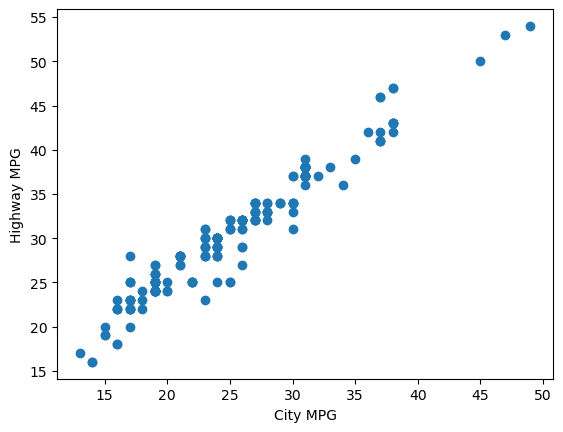

In [14]:
x_label = "wt"
y_label = "price"

x_label = "city-mpg"
y_label = "hwy-mpg"
plt.scatter(data[x_label], data[y_label])
plt.ylabel("Highway MPG")
plt.xlabel("City MPG")

# Regression

Dr. Ruozzi discussed linear regression in lecture. 

What's the goal of supervised learning? (Slide 10)

What hypothesis space do we use for linear regression? (Slide 13)

What's a loss function? Which loss function is suggested? (Slide 16)

How do we use a loss function? (Slide 16)

What's an alternative to an exact solution? (Slide 21)

Dr. Ruozzi discussed linear regression in lecture. The hypothesis space for linear regression is $$f(x) = ax + b$$

We're going to predict some $\hat{y} = f(x)$ and we want $\hat{y}$ to be as close to $y$ for each data point as we can make it. To do this, we'll use a simple loss function: 
$$L(f) = \frac{1}{M} \sum_m(\hat{y}^{(m)} - y^{(m)})^2$$

If we let $\hat{y} = f(x)$, our loss function is now $$L(f) = \frac{1}{M}\sum_m(ax^{(m)} + b - y^{(m)})^2$$

We want the best model, with the best values for $a$ and $b$. This happens when we minimize the loss function $$\min_{a,b}\frac{1}{M}\sum_m (ax^{(m)} + b - y^{(m)})^2$$

Instead of finding the exact solution, we can work our way there using gradient descent. We define $\theta=(a,b)$ and iterate until convergence: $$\theta_{t+1} = \theta_t - \gamma_t \nabla J(\theta_t)$$


## From Theory to Practicality

How do we use that alternative?

Discussion followed on the board and can be put here. Reach out and remind me if you're looking for it!

Implement it!

In [15]:
# Our data
x = data[x_label]
y = data[y_label]

In [16]:
# Define gradients as functions of (a, b, x, y)
M = data.shape[0]

def grad_a(a, b, x, y):
    return 2 / M * np.sum(x * (a * x + b - y))

def grad_b(a, b, x, y):
    return 2 / M * np.sum(a * x + b - y)

The next cell defines hyperparameters. We discussed setting them and picked some random values.

In [17]:
# Define hyperparameters (learning rate, initial theta)
GAMMA = 2e-4      # learning rate
Theta_0 = (2, 2)  # (a, b)

We initially tried running with learning rate of $2\times 10^{-2}$, "training" for 20 steps. When we checked `theta_s`, we saw that the parameters were wildly large.

We then changed to $2\times 10^{-10}$. The parameters barely budged.

We then changed to $2\times 10^{-5}$. The parameters changed and could have been reasonable, so we moved on and plotted them.

After plotting, we tried $\gamma = 2\times 10^{-4}$. This seemed to be a good fit. We increased the number of steps to 2000 and saw no improvement, so we considered this good enough.

In [18]:
# Implement training loop
theta_s =[Theta_0]
for _ in range(2000):  # In hindsight, this 2000 
    a, b = theta_s[-1]
    a_new = a - GAMMA * grad_a(a,b,x,y)
    b_new = b - GAMMA * grad_b(a,b,x,y)
    theta_s.append((a_new, b_new))

In [19]:
# theta_s  # Originally, we checked the parameters to look for instability and lack of movement.

Having trained a model, we could then infer results. We "generate some test data" for seeing the line predicted by the model.

In [20]:
# Get final model
a_final, b_final = theta_s[-1]

# Apply model to even intervals of x
pred_x = np.linspace(x.min(), x.max(), 10)
pred_y = a_final * pred_x + b_final

We showed the results:

Text(0.5, 1.0, 'Highway MPG from City MPG')

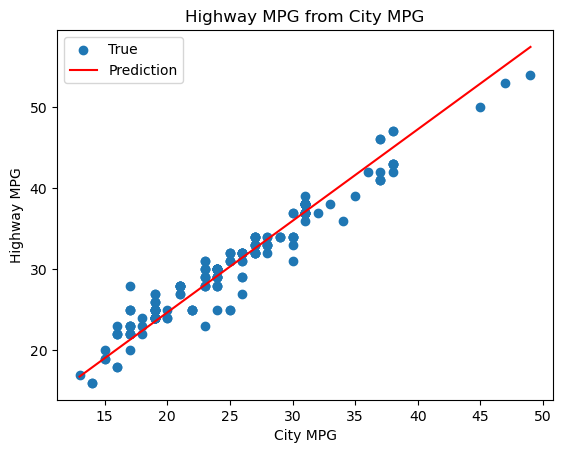

In [21]:
# Show result
plt.scatter(data[x_label], data[y_label], label="True")
plt.plot(pred_x, pred_y, color='red', label="Prediction")
plt.ylabel("Highway MPG")
plt.xlabel("City MPG")
plt.legend()
plt.title("Highway MPG from City MPG")